# Projet Machine Learning: Prédiction de l'émission de CO2

L'objectif de ce projet est de se servir des informations collectées 

Nous allons commencer par importer les librairies dont nous aurons besoin et à charger les données. 

In [244]:
import pandas as pd
import numpy as np
import random as rd



import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


%matplotlib inline





In [245]:
# Spécifiez le chemin du fichier Excel
energy ="global-data-on-sustainable-energy (1).csv"
energy=pd.read_csv(energy, sep=",")
energy

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


Le jeu de données est composé de 3649 observations et 21 variables. Les observations, représentant les individus, sont les données liées à la consommation d'énergie colléctées dans 176 pays et sur 21 années. Théoriquement, on devrait avoir 3696 observations. Il y a donc des données manquantes. Nous allons faire une analyse exploratoire afin de les identifier.

## Analyse exploratoire des données : 

La première étape de l'analyse descriptive est de vérifier l'encodage de nos données. 

In [246]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

Nous voyons que sur les 21 variables, 2 sont considérées comme qualitatives : Entity et Density. 
Les autres sont considérées comme quantitatives. Cependant l'encodage de Density et Year ne sont pas optimales au vu des observations. En effet, Year devrait être considérée comme qualitative puisque nous n'avons que 21 modalités. De même, Density représentant un scalaire, il serait pertinent de l'encoder comme une variable quantitative.

In [247]:
energy["Entity"]=pd.Categorical(energy["Entity"],ordered=False)
energy["Year"]=pd.Categorical(energy["Year"],ordered=True)
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype   
---  ------                                                            --------------  -----   
 0   Entity                                                            3649 non-null   category
 1   Year                                                              3649 non-null   category
 2   Access to electricity (% of population)                           3639 non-null   float64 
 3   Access to clean fuels for cooking                                 3480 non-null   float64 
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64 
 5   Financial flows to developing countries (US $)                    1560 non-null   float64 
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64 
 7   Electricity from fossil 

In [248]:
import re 
def clean_density(density):
    if pd.isnull(density):
        return np.nan
    if isinstance(density, (int,float)): 
        return density
    
    cleaned_density=re.sub(r'[^0-9.]', '', str(density))
    return float(cleaned_density)
energy['Density\\n(P/Km2)']=energy['Density\\n(P/Km2)'].apply(clean_density)



In [249]:
energy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype   
---  ------                                                            --------------  -----   
 0   Entity                                                            3649 non-null   category
 1   Year                                                              3649 non-null   category
 2   Access to electricity (% of population)                           3639 non-null   float64 
 3   Access to clean fuels for cooking                                 3480 non-null   float64 
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64 
 5   Financial flows to developing countries (US $)                    1560 non-null   float64 
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64 
 7   Electricity from fossil 

In [250]:
energy.head(270)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60.0,652230.0,33.93911,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Bahrain,2013,100.000000,100.0,0.90,NaN,0.00,24.36,0.0,0.00,...,161365.53000,9.54,28850.000380,NaN,5.416840,24744.296960,2239.0,765.0,26.06670,50.557700
266,Bahrain,2014,100.000000,100.0,4.26,NaN,0.00,25.62,0.0,0.01,...,153929.60000,8.77,30280.000690,NaN,4.350391,24989.437530,2239.0,765.0,26.06670,50.557700
267,Bahrain,2015,100.000000,100.0,4.15,NaN,0.00,26.77,0.0,0.01,...,149472.80000,9.05,30579.999920,NaN,2.485379,22634.085650,2239.0,765.0,26.06670,50.557700
268,Bahrain,2016,100.000000,100.0,4.69,NaN,0.00,26.80,0.0,0.01,...,144113.94000,8.62,30299.999240,NaN,3.558128,22608.452560,2239.0,765.0,26.06670,50.557700


On a bien le bon format pour toutes nos variables. Passons maintenant à l'identification des valeurs manquantes

In [251]:

energy_missing_value = energy.isnull().sum().sort_values(ascending=False)
print(energy_missing_value)

M=energy.isnull().sum().values
T= np.sum(M)
Percent= np.floor(1/energy.shape[0]*M*100)
#print(M)
print("Taux de valeurs manquantes par variable  en % : ")
print(Percent)
print("Taux global de valeurs manquantes  en % : ")
print(100*T/(energy.shape[0]*energy.shape[1]))





Renewables (% equivalent primary energy)                            2137
Financial flows to developing countries (US $)                      2089
Renewable-electricity-generating-capacity-per-capita                 931
Value_co2_emissions_kt_by_country                                    428
gdp_growth                                                           317
gdp_per_capita                                                       282
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Renewable energy share in the total final energy consumption (%)     194
Access to clean fuels for cooking                                    169
Electricity from nuclear (TWh)                                       126
Low-carbon electricity (% electricity)                                42
Electricity from renewables (TWh)                                     21
Electricity from fossil fuels (TWh)                                   21
Access to electricity (% of population)            

On remarque qu'il y a des données manquantes pour 11 variables. On fait le choix de ne garder que les variables qui ont un taux de données manquantes inférieur à 15%. Nous allons donc supprimer de notre étude les variables : Renewable-electricity-generating-capacity-per-capita, Financial flows to developing
countries (US Dollars) et Renewables (% equivalent primary energy).

In [252]:
#to_drop=['Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)']
energy=energy.drop(energy.columns[4],axis=1)
#energy=energy
energy.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


In [253]:
energy=energy.drop(energy.columns[4],axis=1)
energy.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


In [254]:
energy=energy.drop(energy.columns[12],axis=1)
energy.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


In [255]:
M=energy.isnull().sum().values
T= np.sum(M)
Percent= np.floor(1/energy.shape[0]*M*100)
#print(M)
print("Taux de valeurs manquantes par variable en % : ")
print(Percent)
print("Taux de valeurs manquantes par variable en % : ")
print(100*T/(energy.shape[0]*energy.shape[1]))

Taux de valeurs manquantes par variable en % : 
[ 0.  0.  0.  4.  5.  0.  3.  0.  1.  0.  5. 11.  8.  7.  0.  0.  0.  0.]
Taux de valeurs manquantes par variable en % : 
2.7724490728053346


En enlevant ces colonnes, nous avons drastiquement diminué le taux de valeurs manquantes dans nos données. Ce qui rend notre jeu de données plus exploitable et donc nos prévisions plus pertinentes.

In [256]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype   
---  ------                                                            --------------  -----   
 0   Entity                                                            3649 non-null   category
 1   Year                                                              3649 non-null   category
 2   Access to electricity (% of population)                           3639 non-null   float64 
 3   Access to clean fuels for cooking                                 3480 non-null   float64 
 4   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64 
 5   Electricity from fossil fuels (TWh)                               3628 non-null   float64 
 6   Electricity from nuclear (TWh)                                    3523 non-null   float64 
 7   Electricity from renewab

In [257]:
energy= energy.dropna()
energy.info()
energy.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2868 entries, 3 to 3647
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype   
---  ------                                                            --------------  -----   
 0   Entity                                                            2868 non-null   category
 1   Year                                                              2868 non-null   category
 2   Access to electricity (% of population)                           2868 non-null   float64 
 3   Access to clean fuels for cooking                                 2868 non-null   float64 
 4   Renewable energy share in the total final energy consumption (%)  2868 non-null   float64 
 5   Electricity from fossil fuels (TWh)                               2868 non-null   float64 
 6   Electricity from nuclear (TWh)                                    2868 non-null   float64 
 7   Electricity from renewab

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
3,Afghanistan,2003,14.738506,9.50,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,60.0,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,60.0,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,60.0,652230.0,33.93911,67.709953


Début Q4 

## Pour les variables qualitatives 

In [258]:
energy.Year.describe()
#energy.Year.value_counts()

count     2868
unique      20
top       2015
freq       147
Name: Year, dtype: int64

In [259]:
pd.crosstab(energy.Year, "freq")


col_0,freq
Year,
2000,137
2001,138
2002,140
2003,141
2004,141
2005,141
2006,141
2007,144
2008,144


<Axes: xlabel='Year'>

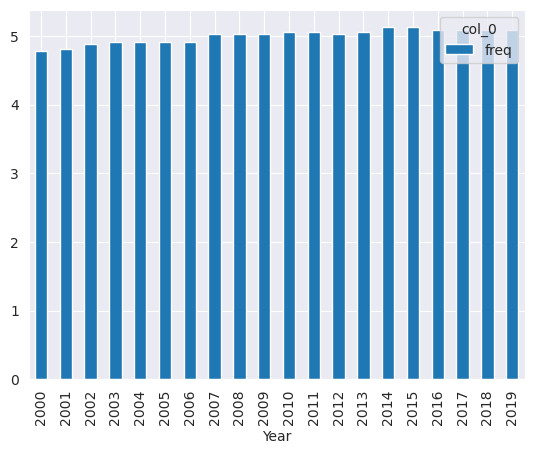

In [260]:
t=pd.crosstab(energy.Year, "freq", normalize=True)
(t * 100).plot(kind = "bar")
#t.plot.pie(subplots=True, figsize = (6, 6))

<Axes: xlabel='Entity'>

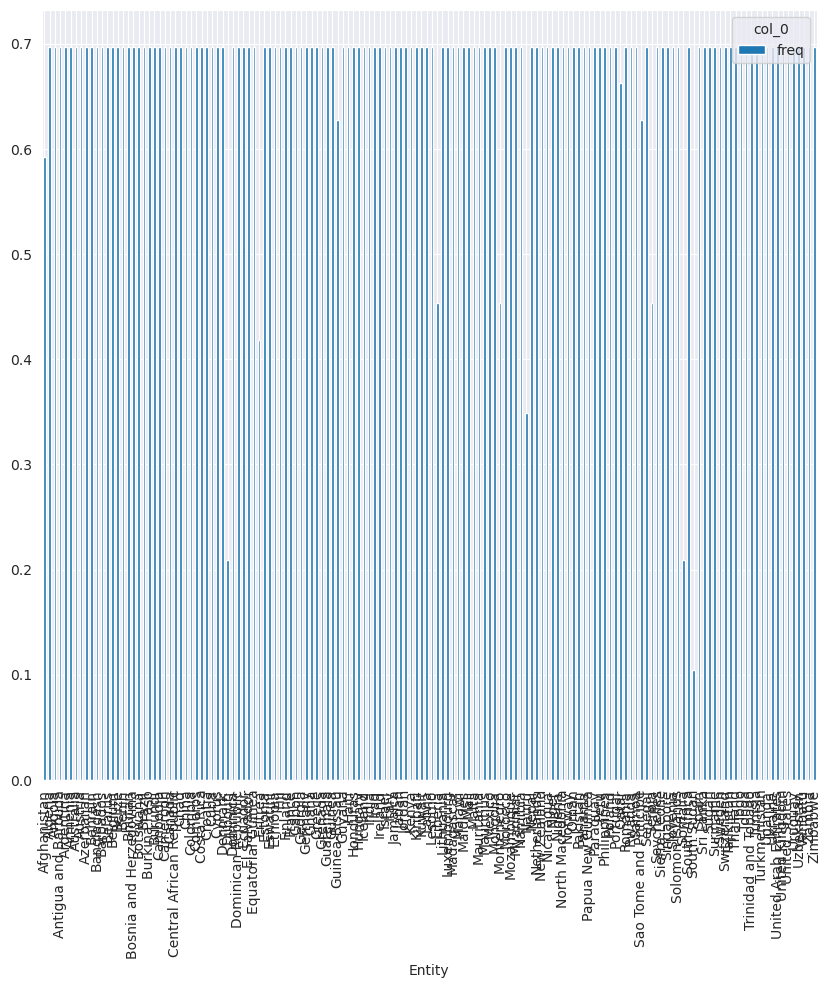

In [261]:


pd.crosstab(energy.Entity, "freq").head(40)
#energy.Entity.value_counts()
t=pd.crosstab(energy.Entity, "freq", normalize=True)
(t * 100).plot(kind = "bar", figsize = (10, 10))

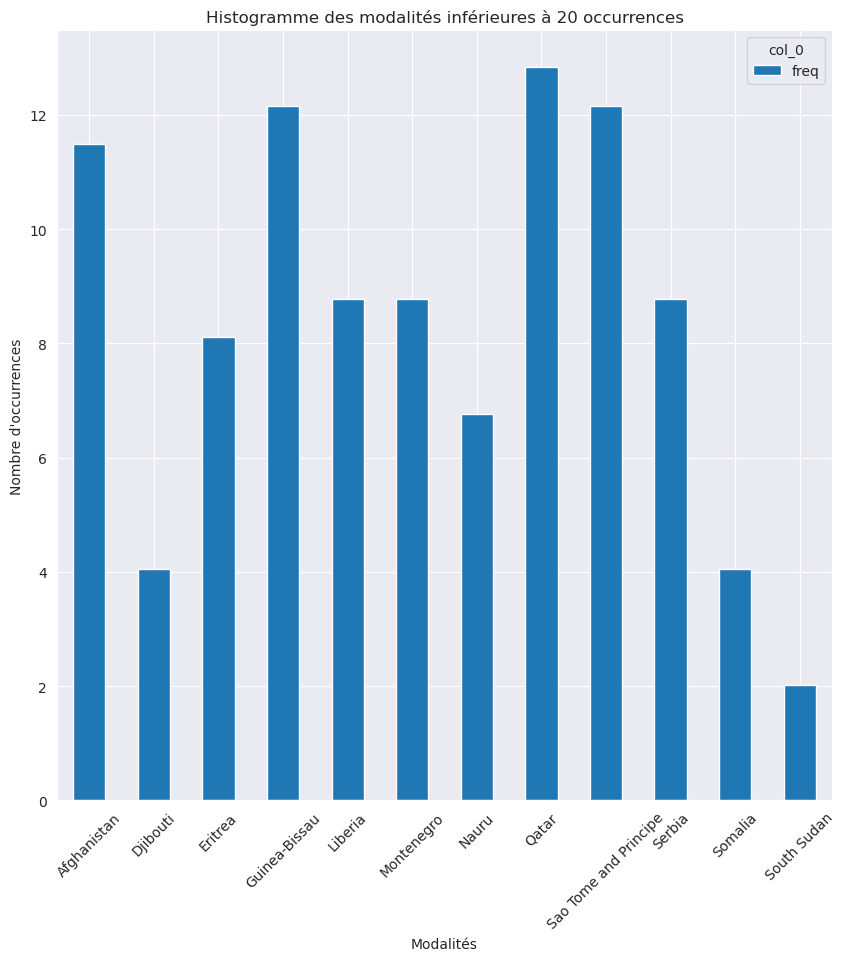

In [262]:



modalites = energy['Entity'].value_counts()
modalites_a_afficher = modalites[modalites < 20].index

# Filtrer le DataFrame pour ne conserver que les modalités sélectionnées
energy_filtre = energy[energy['Entity'].isin(modalites_a_afficher)]
t=pd.crosstab(energy_filtre.Entity,"freq", normalize=True)
(t * 100).plot(kind = "bar", figsize = (10, 10))
plt.title('Histogramme des modalités inférieures à 20 occurrences')
plt.xlabel('Modalités')
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)
plt.show()

Pour les variables quantitatives

In [263]:
energy.describe().round(2)

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
count,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00
mean,76.58,62.17,35.80,76.69,15.34,26.60,39.63,26082.46,5.42,168818.22,3.90,12577.05,228.21,658166.76,18.14,12.97
std,31.51,39.24,30.02,374.42,78.78,107.64,34.45,37097.46,3.58,818020.25,4.65,18730.48,742.36,1705047.83,24.92,65.48
min,1.25,0.00,0.00,0.00,0.00,0.00,0.00,105.11,1.03,30.00,-36.66,111.93,2.00,21.00,-40.90,-175.20
25%,53.24,22.08,9.19,0.29,0.00,0.09,6.09,2779.97,3.28,2187.50,1.77,1209.80,31.00,29743.00,1.65,-10.94
50%,97.00,81.55,28.79,3.00,0.00,1.68,35.01,11922.76,4.40,10425.00,3.79,4168.11,83.00,131957.00,17.06,18.64
75%,100.00,100.00,60.67,25.79,0.00,10.10,66.88,31838.56,6.14,58145.00,5.96,14828.34,206.00,488100.00,39.40,43.68
max,100.00,100.00,96.04,5098.22,809.41,2014.57,100.00,262585.70,32.57,10707219.73,63.38,123514.20,8358.00,9984670.00,64.96,178.07


array([[<Axes: title={'center': 'Access to electricity (% of population)'}>,
        <Axes: title={'center': 'Access to clean fuels for cooking'}>],
       [<Axes: title={'center': 'Renewable energy share in the total final energy consumption (%)'}>,
        <Axes: title={'center': 'Electricity from fossil fuels (TWh)'}>],
       [<Axes: title={'center': 'Electricity from nuclear (TWh)'}>,
        <Axes: title={'center': 'Electricity from renewables (TWh)'}>],
       [<Axes: title={'center': 'Low-carbon electricity (% electricity)'}>,
        <Axes: title={'center': 'Primary energy consumption per capita (kWh/person)'}>],
       [<Axes: title={'center': 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'}>,
        <Axes: title={'center': 'Value_co2_emissions_kt_by_country'}>],
       [<Axes: title={'center': 'gdp_growth'}>,
        <Axes: title={'center': 'gdp_per_capita'}>],
       [<Axes: title={'center': 'Density\\n(P/Km2)'}>,
        <Axes: title={'center': 'Land Area(Km

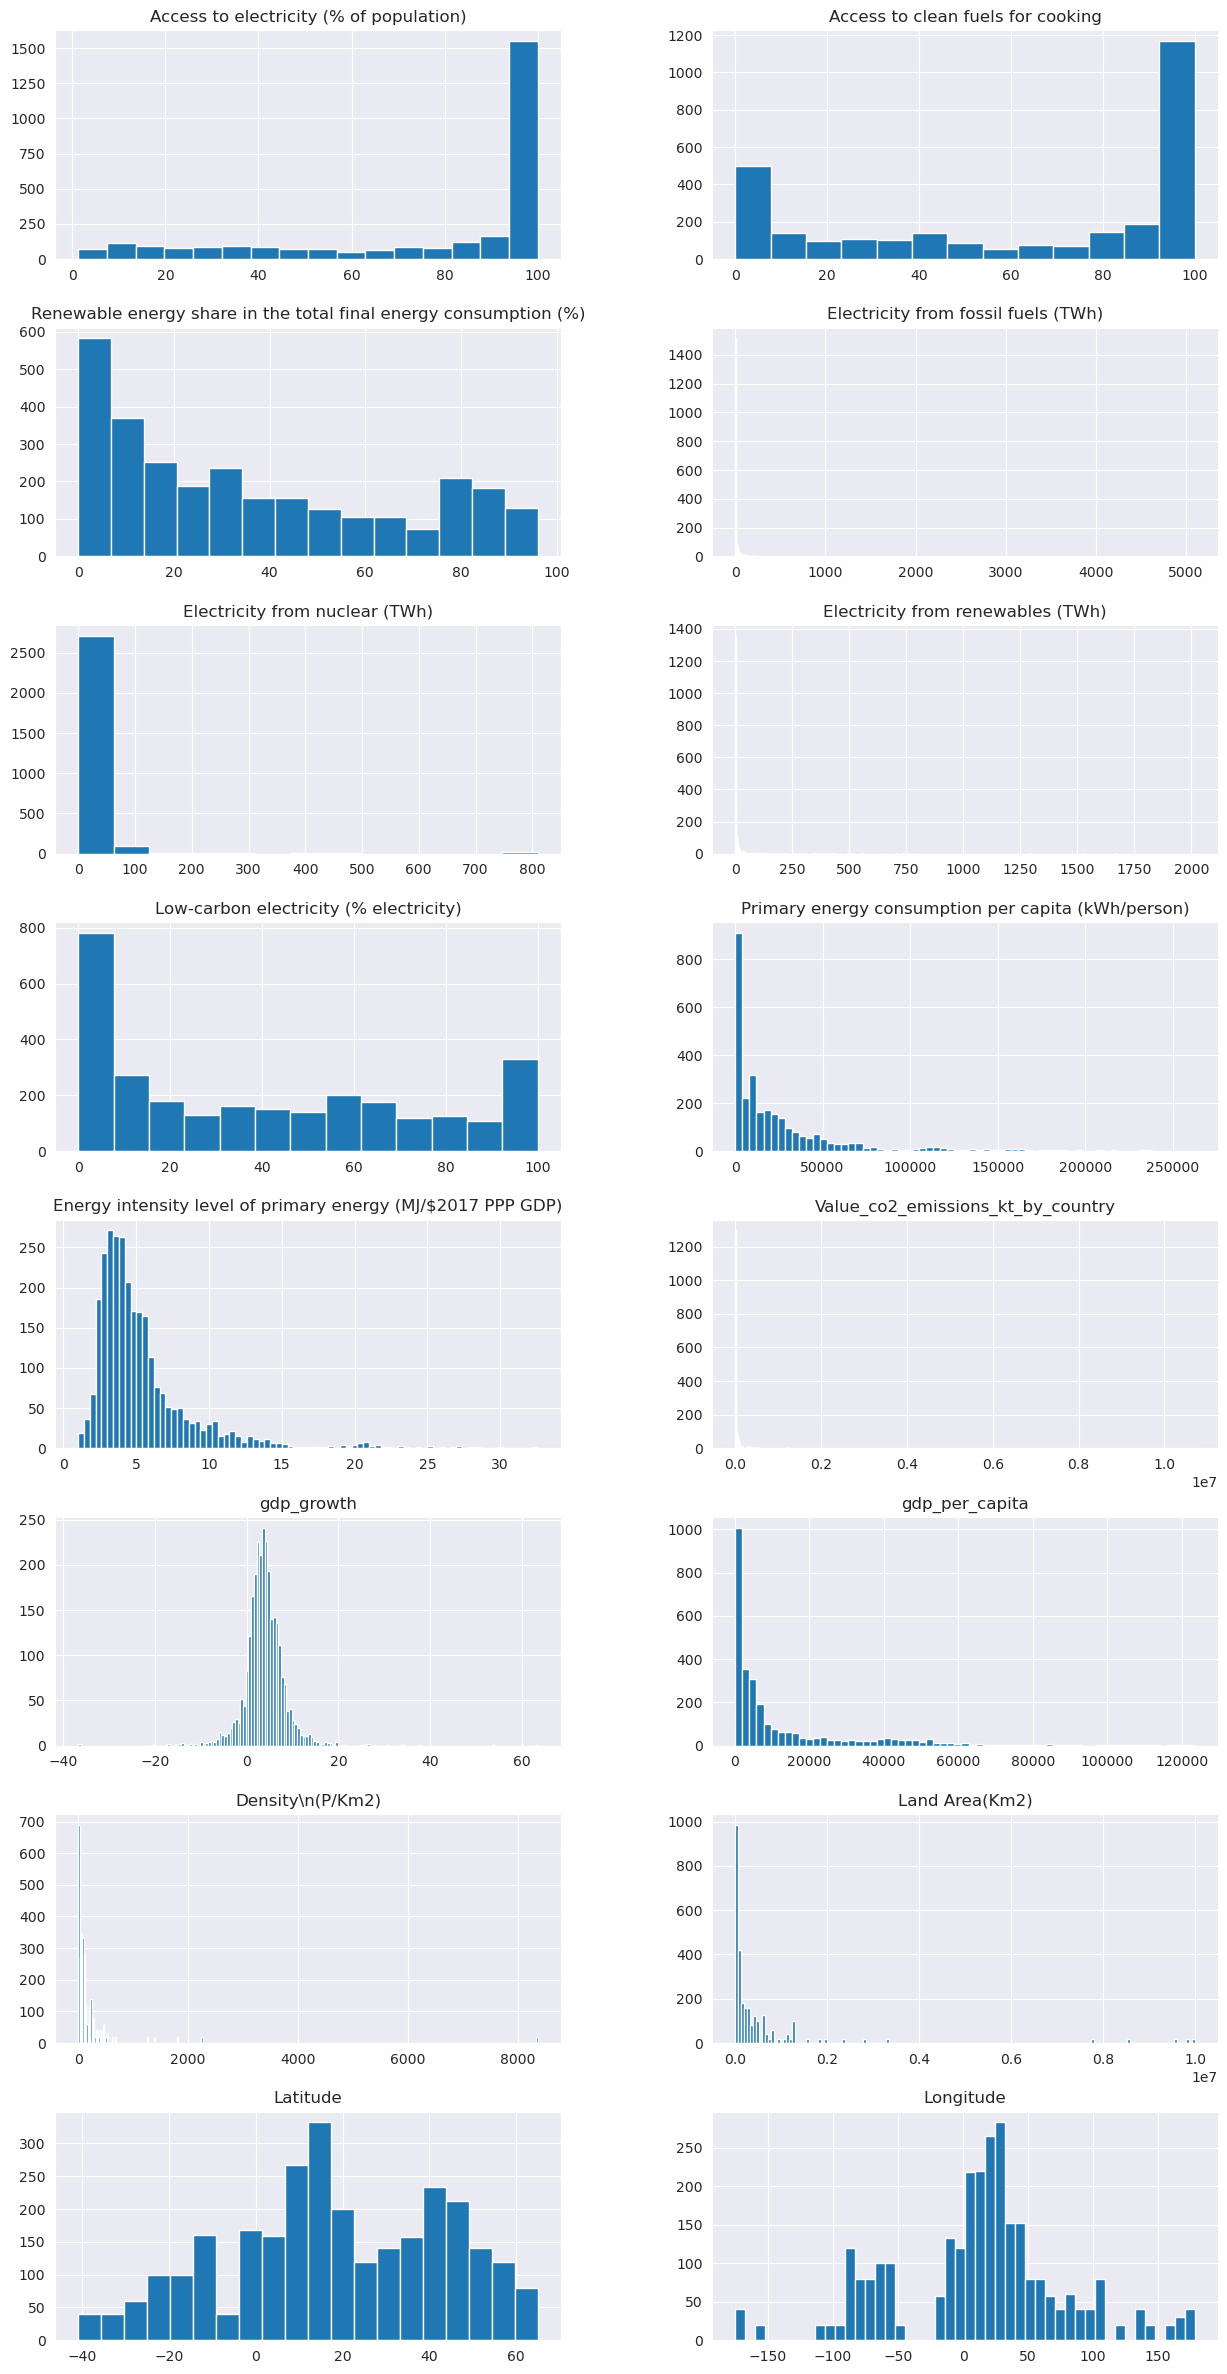

In [264]:

#energy['Access to electricity (% of population)'].hist()
energy.hist(figsize = (15,30),layout=(8,2),bins='auto')


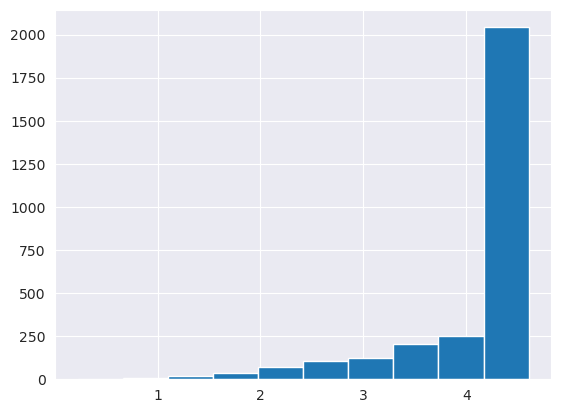

In [265]:
from math import sqrt, log
energy["SAccess to electricity (% of population)"]=energy["Access to electricity (% of population)"].map(lambda x: log(x))
energy["SAccess to electricity (% of population)"].hist()
plt.show()


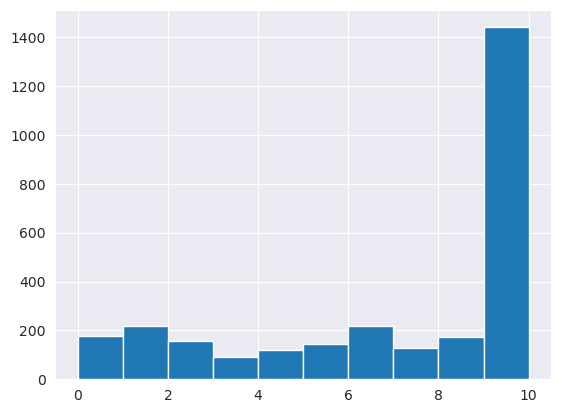

In [266]:
energy["SAccess to clean fuels for cooking"]=energy["Access to clean fuels for cooking"].map(lambda x: sqrt(x))
energy["SAccess to clean fuels for cooking"].hist()
plt.show()


<Axes: >

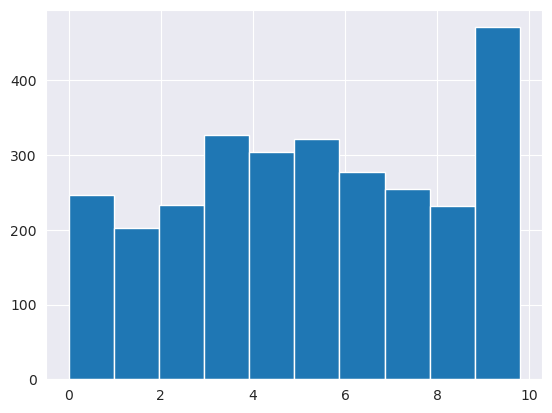

In [267]:

energy["SRenewable energy share in the total final energy consumption (%)"]=energy["Renewable energy share in the total final energy consumption (%)"].map(lambda x: sqrt(x))
energy["SRenewable energy share in the total final energy consumption (%)"].hist()

<Axes: >

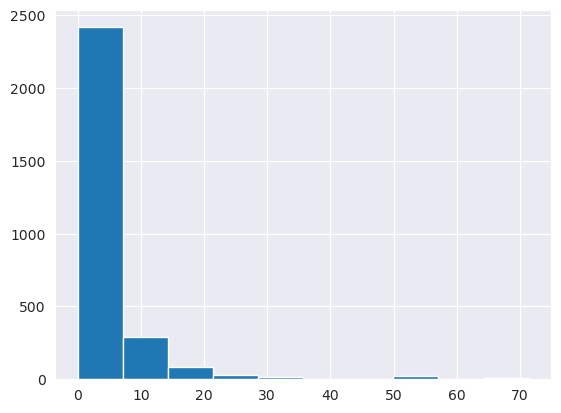

In [268]:
energy["SElectricity from fossil fuels (TWh)"]=energy["Electricity from fossil fuels (TWh)"].map(lambda x: sqrt(x))
energy["SElectricity from fossil fuels (TWh)"].hist()

<Axes: >

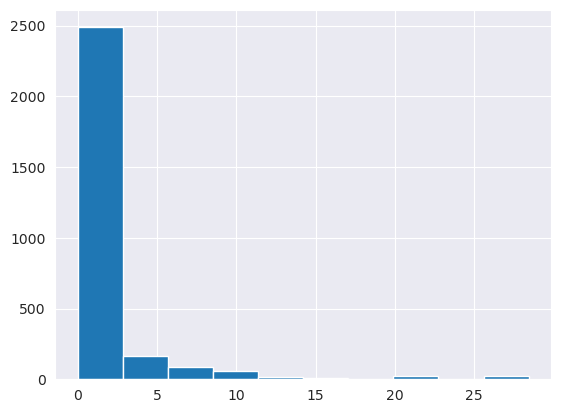

In [269]:
energy["SElectricity from nuclear (TWh)"]=energy["Electricity from nuclear (TWh)"].map(lambda x: sqrt(x))
energy["SElectricity from nuclear (TWh)"].hist()

<Axes: >

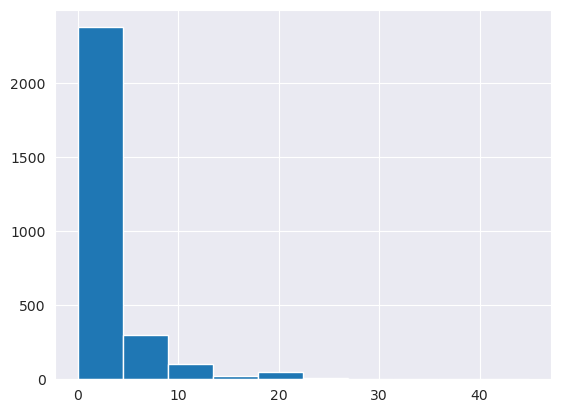

In [270]:
energy["SElectricity from renewables (TWh)"]=energy["Electricity from renewables (TWh)"].map(lambda x: sqrt(x))
energy["SElectricity from renewables (TWh)"].hist()

<Axes: >

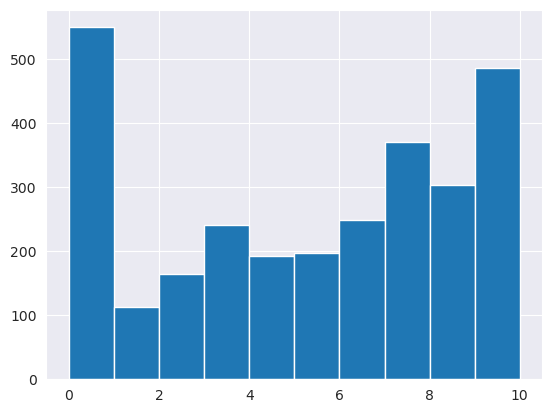

In [271]:
energy["SLow-carbon electricity (% electricity)"]=energy["Low-carbon electricity (% electricity)"].map(lambda x: sqrt((x)))
energy["SLow-carbon electricity (% electricity)"].hist()

<Axes: >

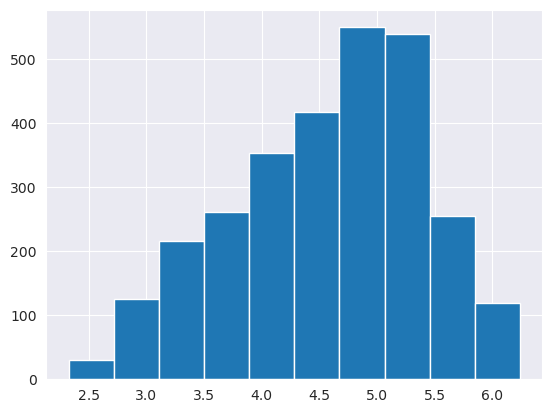

In [272]:
energy["SPrimary energy consumption per capita (kWh/person)"]=energy["Primary energy consumption per capita (kWh/person)"].map(lambda x: log(sqrt(x)))
energy["SPrimary energy consumption per capita (kWh/person)"].hist()

<Axes: >

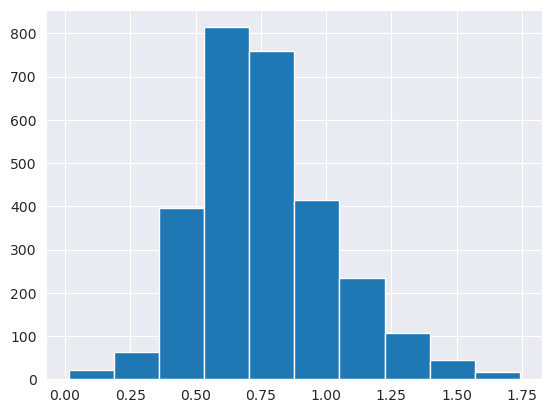

In [273]:
energy["SEnergy intensity level of primary energy (MJ/$2017 PPP GDP)"]=energy["Energy intensity level of primary energy (MJ/$2017 PPP GDP)"].map(lambda x: log(sqrt(x)))
energy["SEnergy intensity level of primary energy (MJ/$2017 PPP GDP)"].hist()

<Axes: >

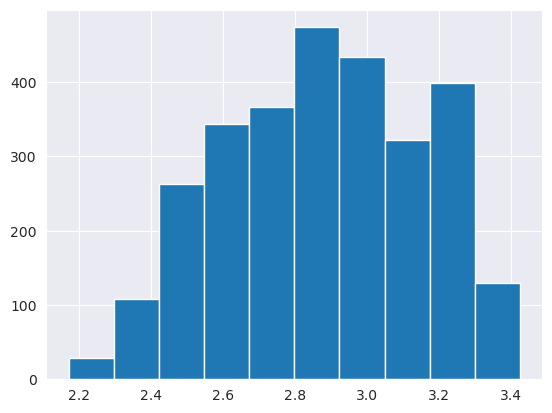

In [274]:
energy["Sgdp_per_capita"]=energy["gdp_per_capita"].map(lambda x:sqrt(log(x)))
energy["Sgdp_per_capita"].hist()

<Axes: >

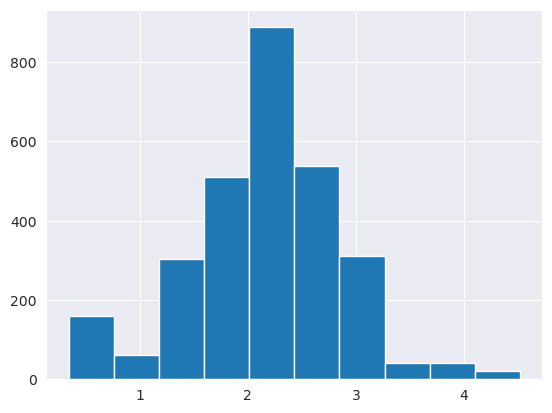

In [275]:
energy["SDensity\\n(P/Km2)"]=energy["Density\\n(P/Km2)"].map(lambda x:log(sqrt(x)))
energy["SDensity\\n(P/Km2)"].hist()

<Axes: >

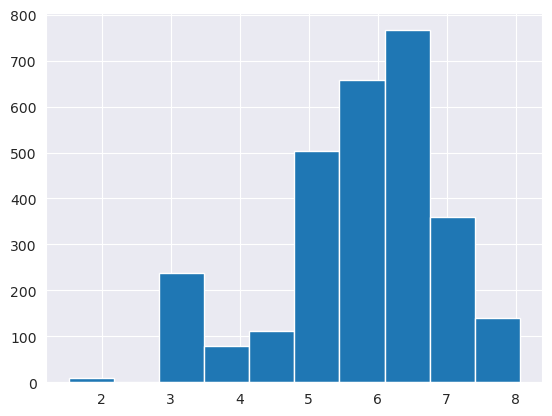

In [276]:
energy["SLand Area(Km2)"]=energy["Land Area(Km2)"].map(lambda x:log(sqrt(x)))
energy["SLand Area(Km2)"].hist()

<Axes: >

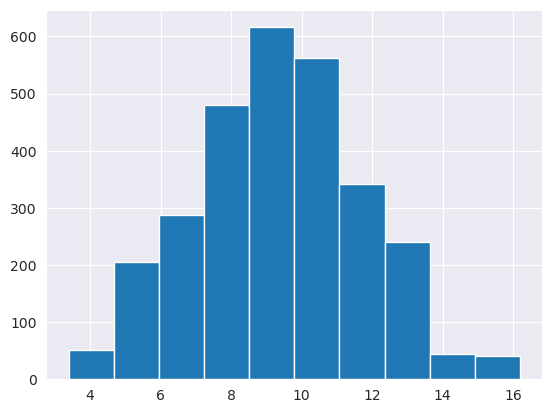

In [277]:
energy["SValue_co2_emissions_kt_by_country"]=energy["Value_co2_emissions_kt_by_country"].map(lambda x:log(x))
energy["SValue_co2_emissions_kt_by_country"].hist()

In [278]:


del energy['Renewable energy share in the total final energy consumption (%)']
del energy['Electricity from fossil fuels (TWh)']
del energy['Electricity from nuclear (TWh)']
del energy['Electricity from renewables (TWh)']
del energy['Low-carbon electricity (% electricity)']
del energy['Primary energy consumption per capita (kWh/person)']
del energy['Energy intensity level of primary energy (MJ/$2017 PPP GDP)']
del energy['gdp_per_capita']
del energy['Density\\n(P/Km2)']
del energy['Land Area(Km2)']
#del energy['Value_co2_emissions_kt_by_country']

energy.describe()

,Access to electricity (% of population),Access to clean fuels for cooking,Value_co2_emissions_kt_by_country,gdp_growth,Latitude,Longitude,SAccess to electricity (% of population),SAccess to clean fuels for cooking,SRenewable energy share in the total final energy consumption (%),SElectricity from fossil fuels (TWh),SElectricity from nuclear (TWh),SElectricity from renewables (TWh),SLow-carbon electricity (% electricity),SPrimary energy consumption per capita (kWh/person),SEnergy intensity level of primary energy (MJ/$2017 PPP GDP),Sgdp_per_capita,SDensity\n(P/Km2),SLand Area(Km2),SValue_co2_emissions_kt_by_country
count,2868.000000,2868.000000,2.868000e+03,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000
mean,76.584630,62.170084,1.688182e+05,3.895326,18.140402,12.970486,4.160131,7.160020,5.261295,4.291032,1.215547,2.758131,5.286579,4.576974,0.770167,2.877588,2.174801,5.760586,9.329532
std,31.510371,39.238548,8.180202e+05,4.645613,24.924975,65.478645,0.743819,3.302725,2.850207,7.635504,3.723479,4.359210,3.418414,0.822569,0.258674,0.276154,0.703011,1.184006,2.384950
min,1.252269,0.000000,3.000000e+01,-36.658153,-40.900557,-175.198242,0.224957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.327504,0.014779,2.172061,0.346574,1.522261,3.401197
25%,53.237811,22.075000,2.187500e+03,1.770575,1.650801,-10.940835,3.974769,4.698402,3.031089,0.538516,0.000000,0.300000,2.468009,3.965097,0.593922,2.664247,1.716994,5.150175,7.690513
50%,97.000000,81.550000,1.042500e+04,3.788166,17.060816,18.643501,4.574711,9.030503,5.365631,1.730606,0.000000,1.296148,5.916901,4.693102,0.740802,2.887078,2.209420,5.895116,9.251961
75%,100.000000,100.000000,5.814500e+04,5.957490,39.399872,43.679291,4.605170,10.000000,7.788934,5.078139,0.000000,3.178443,8.177977,5.184217,0.907412,3.099080,2.663938,6.549138,10.970695
max,100.000000,100.000000,1.070722e+07,63.379875,64.963051,178.065032,4.605170,10.000000,9.800000,71.401821,28.450132,44.883962,10.000000,6.239166,1.741696,3.424049,4.515487,8.058281,16.186429


In [279]:
del energy['Access to clean fuels for cooking']
del energy['Access to electricity (% of population)']

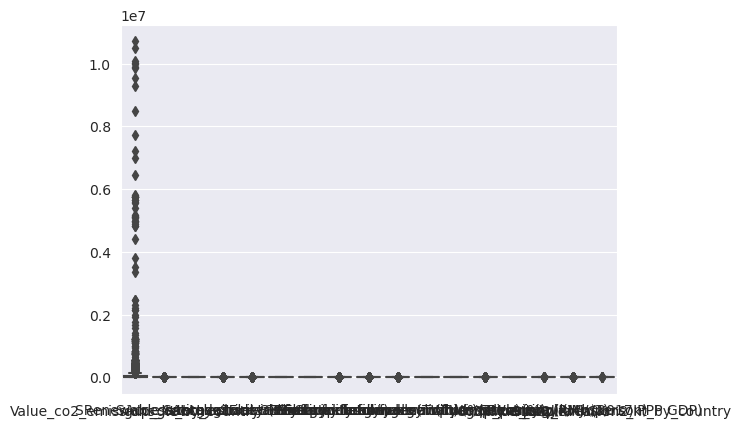

In [280]:

sns.boxplot(data=energy)#,widths=0.75, patch_artist = True)
plt.show()

In [281]:
plt.figure(figsize=(50,6))
energy2=energy.drop(energy.columns[3],axis=1)


<Figure size 5000x600 with 0 Axes>

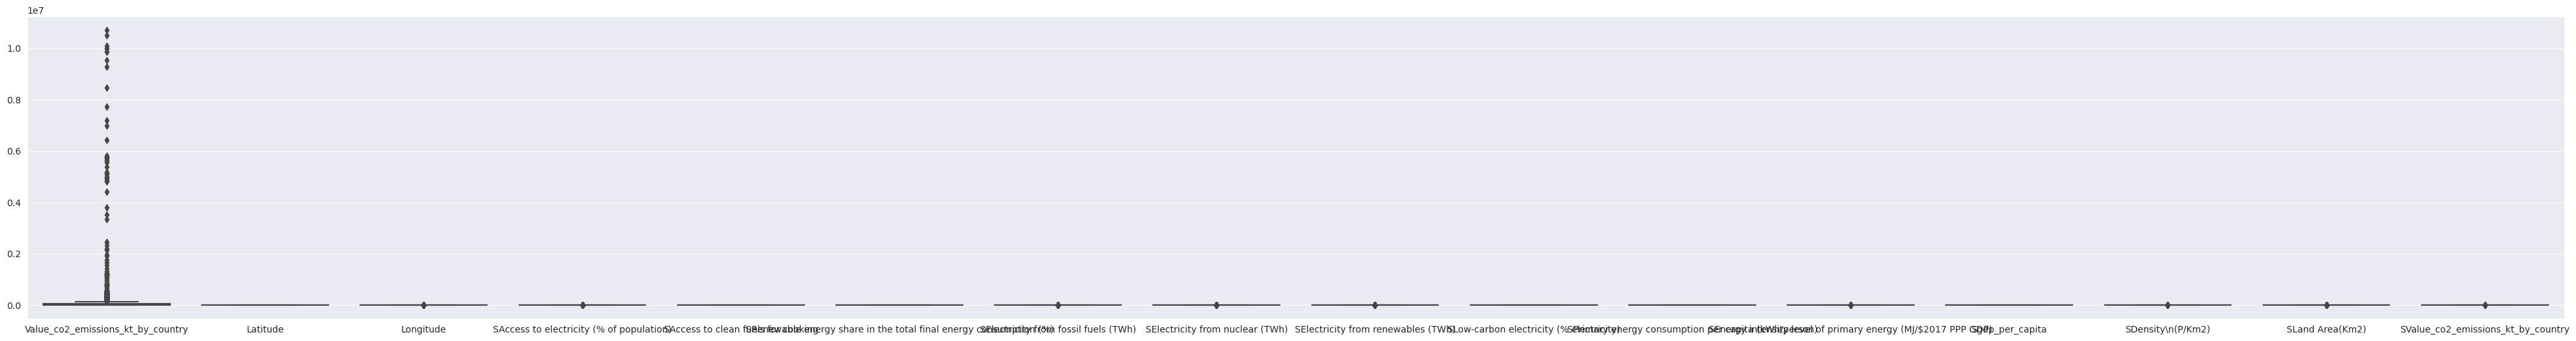

In [282]:
plt.figure(figsize=(50,6))
energy2=energy2.drop(energy2.columns[0],axis=1)
energy2=energy2.drop(energy2.columns[0],axis=1)
sns.boxplot(data=energy2)

plt.show()



<Axes: >

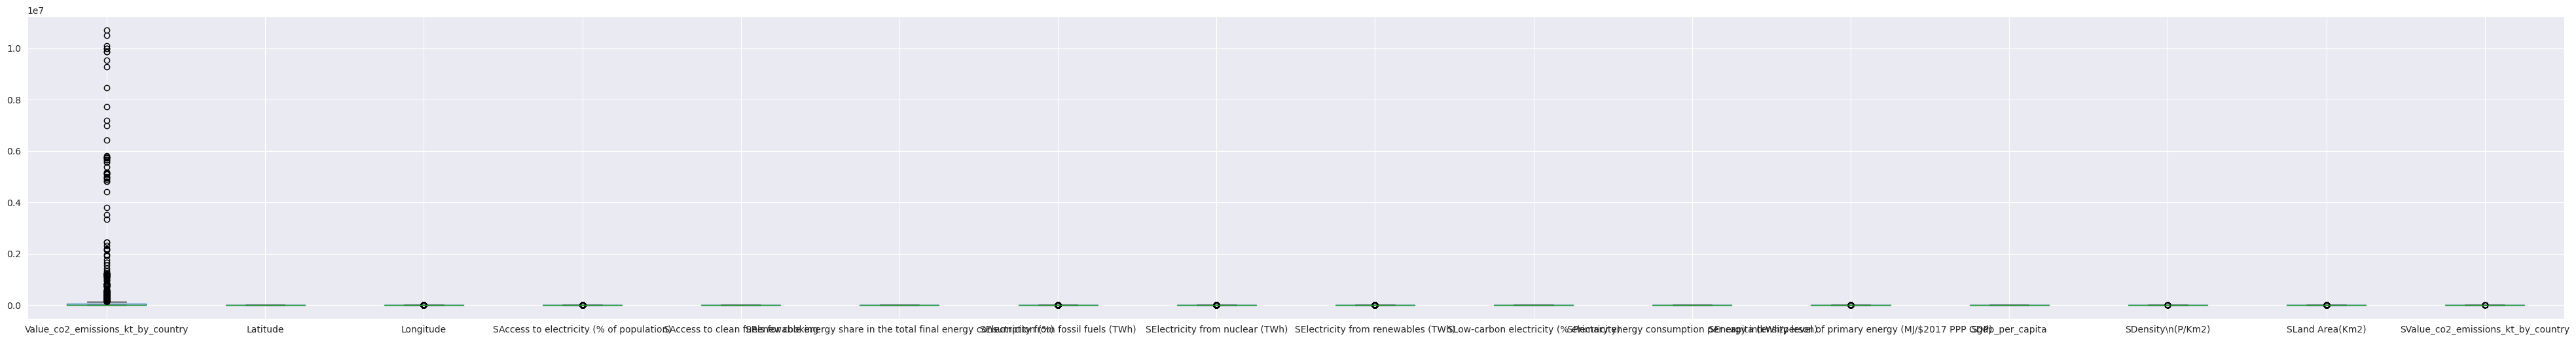

In [283]:
plt.figure(figsize=(50,6))
energy2.boxplot()

<Axes: >

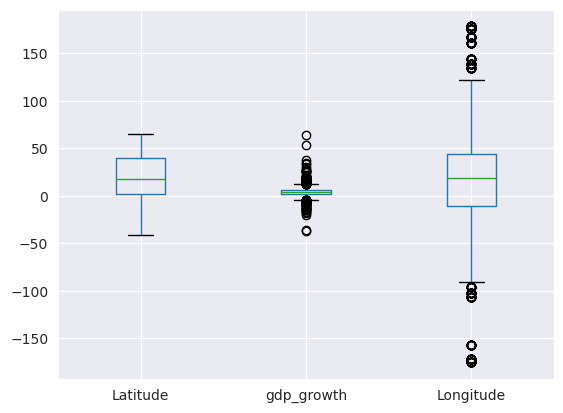

In [284]:
energy.describe()
energy3=energy[['Latitude','gdp_growth','Longitude']]
energy3.boxplot()

On saute à la question 5

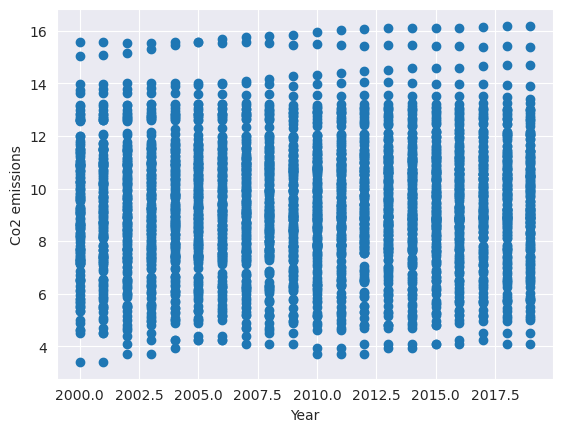

In [285]:
plt.scatter(energy['Year'], energy['SValue_co2_emissions_kt_by_country'])#,c=energy['Entity'].cat.codes)
plt.xlabel('Year')
plt.ylabel('Co2 emissions')
plt.show()

In [289]:
# Calculating standard deviation
sd = energy['Value_co2_emissions_kt_by_country'].std()
m=energy['Value_co2_emissions_kt_by_country'].mean()
minCO2=energy['Value_co2_emissions_kt_by_country'].min()
maxCO2=energy['Value_co2_emissions_kt_by_country'].max()
print("Standard deviation:", sd)
print("Mean:", m)
print("Min:", minCO2)
print("Max:", maxCO2)


Standard deviation: 818020.2459125534
Mean: 168818.21810476022
Min: 30.0
Max: 10707219.73


In [288]:
Moy = energy.groupby('Entity')['Value_co2_emissions_kt_by_country'].mean().reset_index()
Moy_classe = Moy.sort_values(by='Value_co2_emissions_kt_by_country', ascending=False)
print(Moy_classe)

            Entity  Value_co2_emissions_kt_by_country
34           China                       7.636642e+06
169  United States                       5.329539e+06
74           India                       1.633979e+06
81           Japan                       1.183734e+06
62         Germany                       7.736445e+05
..             ...                                ...
138   Saudi Arabia                                NaN
144       Slovakia                                NaN
162         Turkey                                NaN
164         Tuvalu                                NaN
173          Yemen                                NaN

[176 rows x 2 columns]


# 6

# Entre variables quantitatives

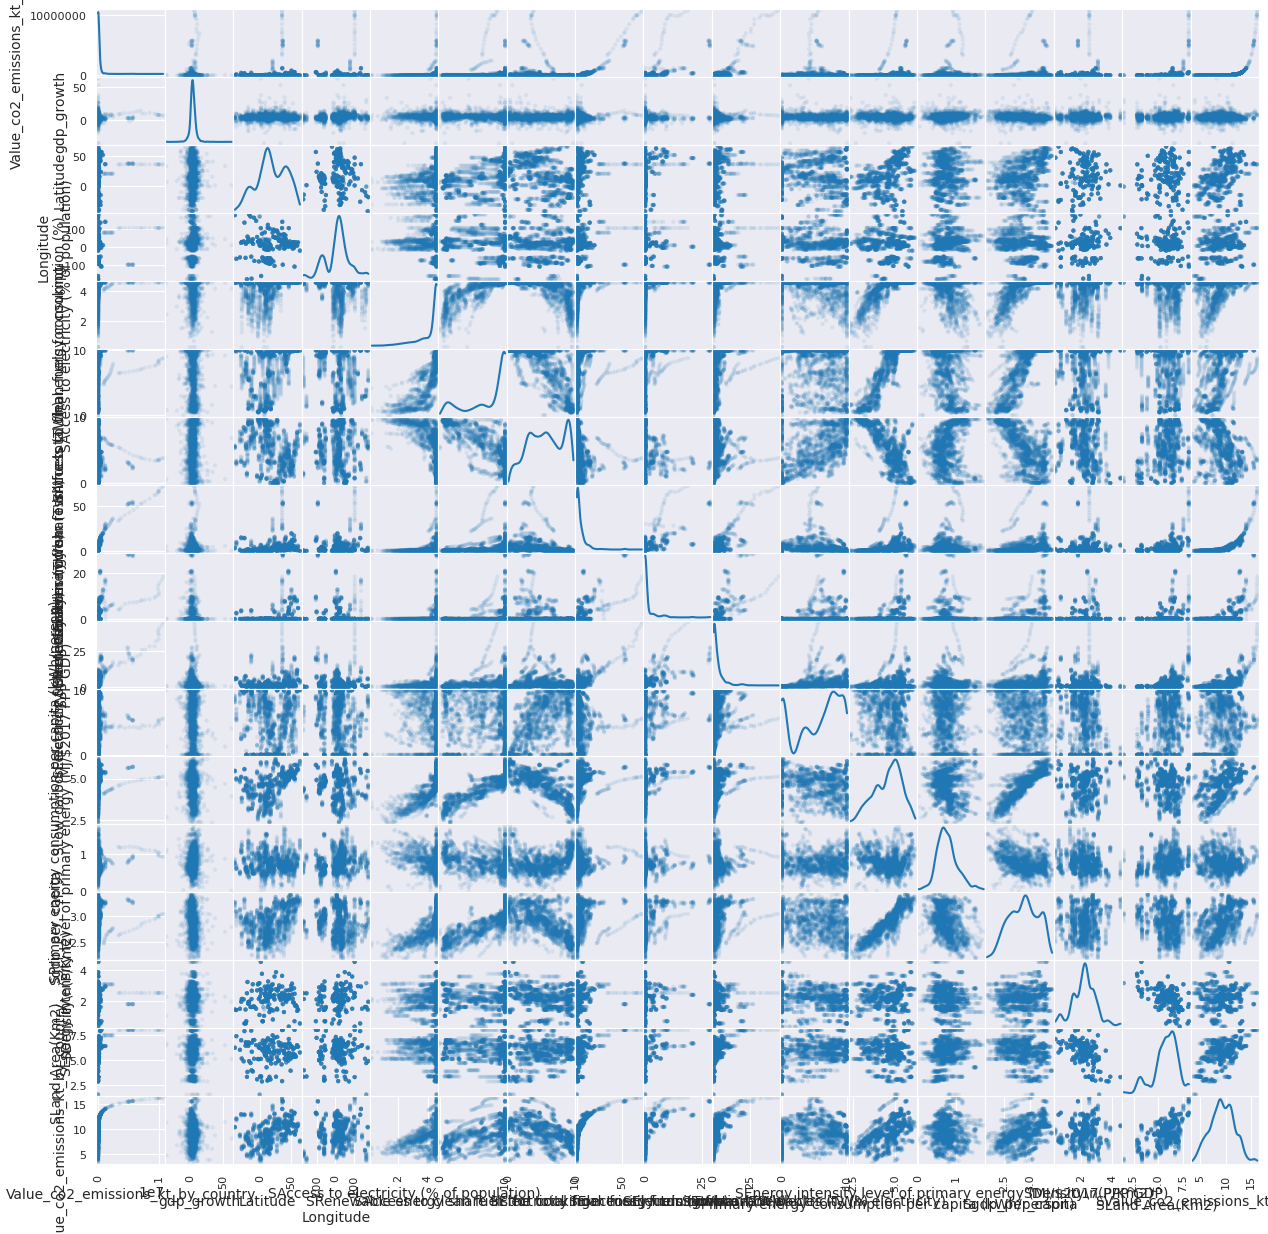

In [294]:
from pandas.plotting import scatter_matrix

scatter_matrix(energy2, alpha=0.1, 
               figsize=(15, 15), diagonal='kde')
plt.show()

In [296]:
!pip install pyensae

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.1/493.1 kB 4.9 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 32.1 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyquicksetup: filename=pyquicksetup-0.2.4-py3-none-any.whl size=6711 sha256=f68edf6772634707ce4bc265dbf9f113299e282be3c9b26d3c0f957511cb6263
  Stored in directory: /home/hountong/.cache/pip/wheels/95/77/67/83fd7a61f48265da1f864d211aac3e4887f6ebd702426e5049
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117032 sha256=ba820d5559b8754903fed5ab24c08e3165fe55694222451b569897d04b42a2c5
  Stored in directory: /home/hountong/.cache/pip/wheels/6a/f3/0c/fa347dfa663f573462c6533d259c2c859e97e103d1ce21538f
Successfully built pyq

/home/hountong/.local/lib/python3.11/site-packages/pyensae/graphhelper/corrplot.py:77: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  if self.df.max().max() > 1 or self.df.min().min() < -1:
/home/hountong/.local/lib/python3.11/site-packages/pyensae/graphhelper/corrplot.py:85: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = self.df.corr()
/home/hountong/.local/lib/python3.11/site-packages/pyensae/graphhelper/linkage.py:43: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = linkage(D, method=meth

<Axes: >

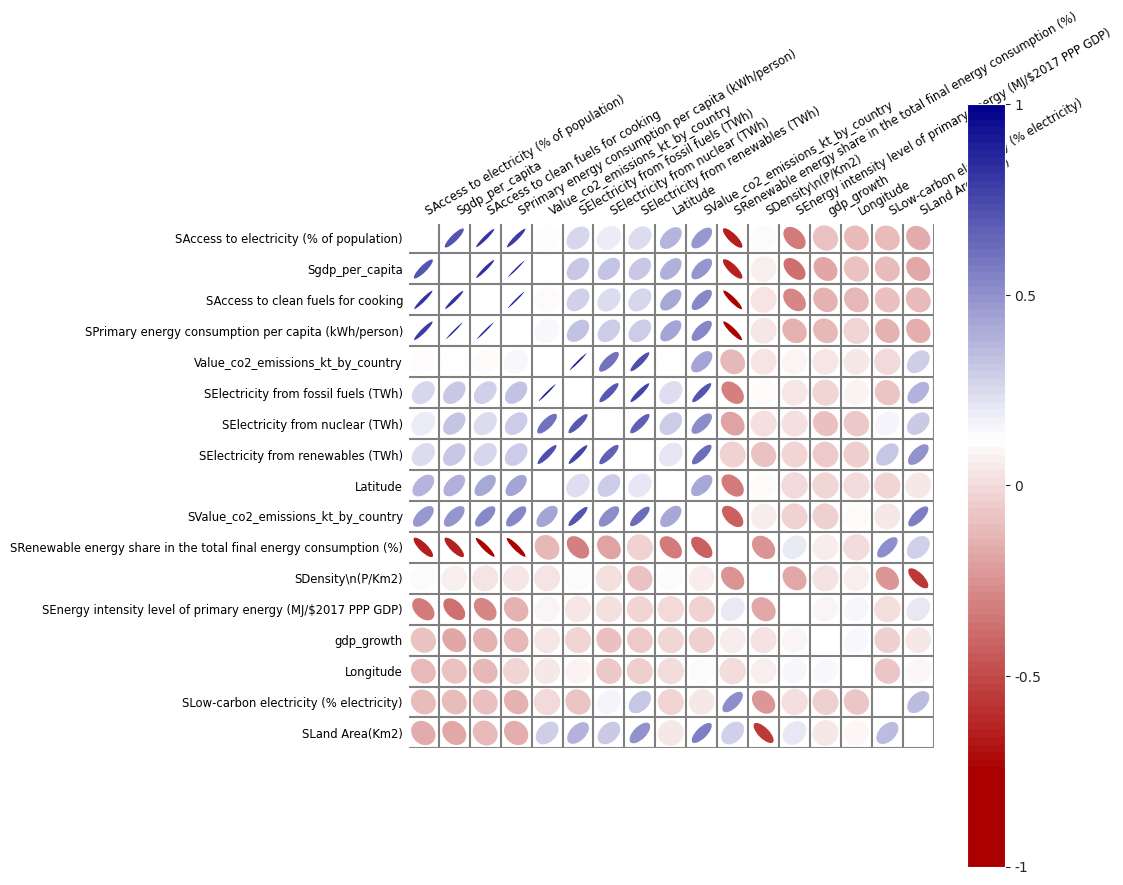

In [298]:
from pyensae.graphhelper import Corrplot

c = Corrplot(energy)
c.plot(figsize=(12,12))

# Variables qualitatives

In [299]:
crosstable=pd.crosstab(energy['Entity'],energy['Year'])
crosstable

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Entity,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Algeria,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Angola,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Antigua and Barbuda,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Argentina,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Uzbekistan,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Vanuatu,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


ValueError: at least one proportion should be greater than zero

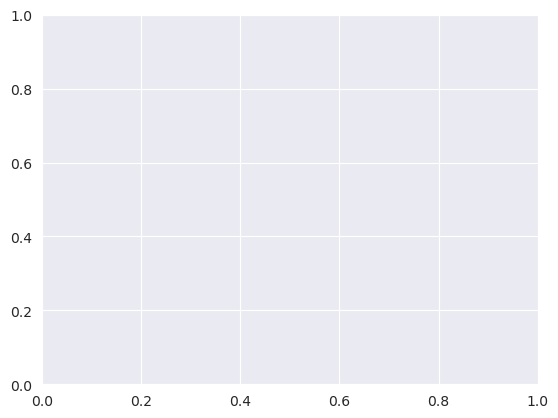